# Classification and Regression Tree (CART)

_Kevin Siswandi_  
**Fundamentals of Machine Learning**  
June 2020  

<span style =" color : green ;font - weight : bold ">The task not performed by defining a function, but it works well.

In [4]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [5]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [6]:
# filter the dataset such that only digits "1" and "7" are left:
f_data = np.array([x for x,t in zip(data, target) if t == 1 or t == 7])
f_target = np.array(list(filter(lambda x: (x == 1 or x == 7), target)))

# check the length of filtered dataset, which should be 361:
print(f_data.shape, f_target.shape)

(361, 64) (361,)


In [11]:
# split the filtered dataset in a training and a test set (#train/#test = 3/2):
X_train, X_test, y_train, y_test = train_test_split(f_data, f_target, 
                                                    test_size=2/5, random_state=42)

### 2.1 Dimension Reduction

<span style =" color : green ;font - weight : bold ">Different method used for dimension reduction (as the choice of method depended on us!)which works fine.

In [12]:
def reduce_dim(x):
    _, m = x.shape
    feat1 = np.mean(x[:, :int(m/5)], axis=1) - \
            np.mean(x[:, int(m/5):], axis=1)
    feat2 = 1.2 * np.mean(x[:, :int(m/3)], axis=1) + \
            np.mean(x[:, int(m/3):], axis=1)
    return np.array([feat1, feat2]).T

### 2.2 Scatterplot

<span style =" color : green ;font - weight : bold ">The implementation is the same as the model solution.

In [13]:
def scatter_plot(X, y):
    assert X.shape[1] == 2, "feature dimention of X should be reduced to 2"
    feat1, feat2 = X[:, 0], X[:, 1]
    # set marker list:
    markers = ['o', 's', '*', 'x', '+', 'D']
    plt.figure(figsize=(8,8))
    for i, label in enumerate(np.unique(y).tolist()):
        plt.scatter(feat1[y == label], feat2[y == label], 
                    s=20, marker=markers[i % len(markers)], 
                    cmap="Set1", label=label)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("feature space")
    plt.legend()
    plt.show()

In [14]:
rd_x_train, rd_x_test = reduce_dim(X_train), reduce_dim(X_test)
#print(rd_x_train.shape, rd_x_test.shape)

<span style =" color : green ;font - weight : bold ">The scatter plots look different from the model answer because we have used a different method for dimension reduction.

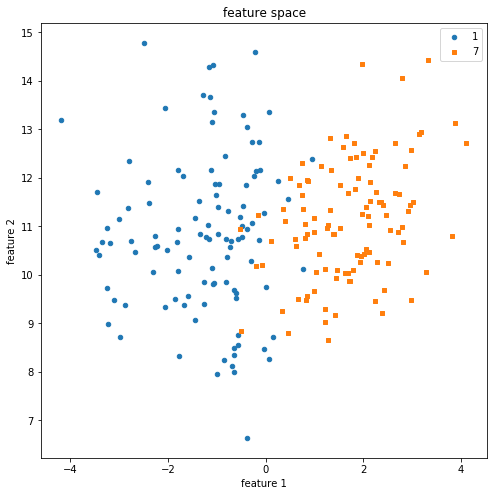

In [9]:
scatter_plot(rd_x_train, y_train)

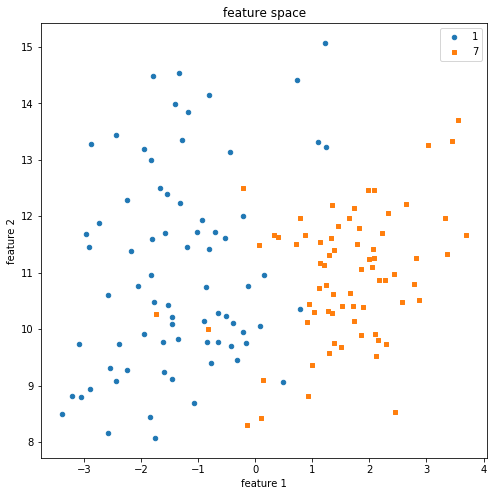

In [10]:
scatter_plot(rd_x_test, y_test)

### 3. Nearest Mean
#### 3.1

<span style =" color : green ;font - weight : bold ">No function is defined to compute the distances from mean, instead Euclidean distance has been used. The method is right, but code could be made more efficient by making use of the argmin function and hence, making use of less number of loops.

In [1]:
X_train_1=[]
X_train_7=[]

from scipy.spatial import distance

def nearest_mean(X_train, Y_train, X_test):
    label=np.zeros(X_test.shape[0])
    #compute the per class means or centroids for training set
    for i in range (X_train.shape[0]):
        if y_train[i]==1:
            X_train_1.append(X_train[i])
            #mean_1=statistics.mean(y_train[i])
        elif y_train[i]==7:
            X_train_7.append(X_train[i])
    Mean_1=np.mean(np.transpose(X_train_1),axis=1)
    Mean_7=np.mean(np.transpose(X_train_7),axis=1)
    
    for i in range (X_test.shape[0]):
        dist_1=distance.euclidean(Mean_1,X_test[i])
        dist_7=distance.euclidean(Mean_7,X_test[i])
        
        if (dist_1>dist_7):
            label[i]=1
        else:
            label[i]=7
        
    return label
        

<span style =" color : green ;font - weight : bold ">Computaion of accuracy is missing.

In [15]:
labels=nearest_mean(X_train, y_train, X_test)
print(labels)

[1. 1. 1. 7. 7. 1. 1. 7. 7. 1. 7. 7. 7. 7. 1. 7. 1. 7. 1. 1. 7. 7. 7. 1.
 1. 7. 1. 7. 7. 7. 1. 1. 7. 1. 1. 7. 1. 7. 7. 7. 1. 7. 7. 1. 7. 1. 7. 1.
 1. 7. 1. 1. 7. 1. 1. 1. 7. 1. 7. 7. 7. 7. 1. 1. 7. 7. 7. 7. 7. 1. 1. 7.
 7. 1. 7. 1. 1. 1. 7. 7. 1. 1. 1. 1. 7. 7. 1. 7. 7. 1. 7. 7. 7. 7. 1. 7.
 7. 1. 7. 1. 1. 1. 1. 7. 1. 7. 7. 7. 7. 7. 1. 7. 1. 7. 1. 7. 1. 7. 7. 1.
 1. 1. 1. 1. 7. 1. 1. 1. 1. 1. 1. 1. 1. 7. 7. 7. 1. 1. 1. 7. 7. 7. 1. 7.
 7.]


#### 3.2

<span style =" color : green ;font - weight : bold ">The boundary region should not be plotted using nearest neighbor algorith. Also the scatter plot should be overlayed on the boundary region plot.

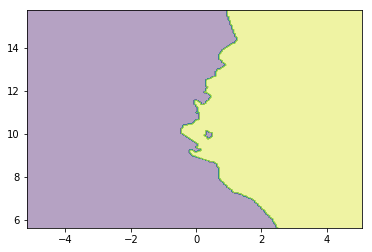

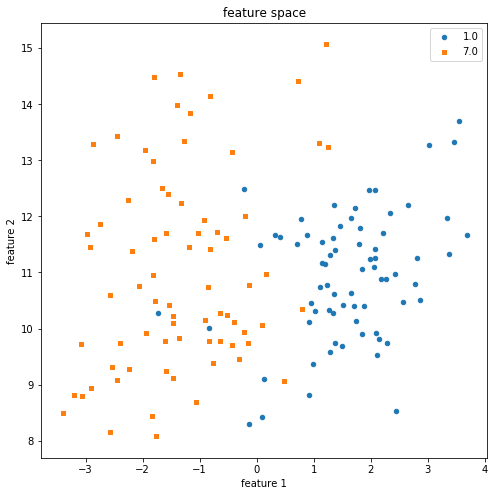

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)  #as I could not figure out how to predict labels with the new meshgrid, I have used 
#classifier for finding boundary regions.
clf.fit(rd_x_train,y_train)
x1_min, x1_max = rd_x_train[:, 0].min() - 1, rd_x_train[:, 0].max() + 1
x2_min, x2_max = rd_x_train[:, 1].min() - 1,rd_x_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05),
                           np.arange(x2_min, x2_max, 0.05))
Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
scatter_plot(rd_x_test, labels)


## 4 QDA 

### 4.1 Implement QDA Training

In [11]:
# convert the labels:
conver_y_train = np.zeros_like(y_train)
conver_y_train[y_train == 1] = 0
conver_y_train[y_train == 7] = 1

conver_y_test = np.zeros_like(y_test)
conver_y_test[y_test == 1] = 0
conver_y_test[y_test == 7] = 1

<span style =" color : green ;font - weight : bold ">The variables (mu, cov and p) have been initialised as numpy arrays and not lists. Actually this makes the entire process very clumsy. The number of loops required are comparatively more, making it inefficient. Overall the implementation is correct.

In [12]:
def fit_qda(training_features, training_labels):
    N, D = training_features.shape
    assert N == len(training_labels)
    label_names = np.unique(training_labels)
    K = len(label_names)
    # initialization:
    labels = np.zeros(N)
    mu = np.zeros((K,D))
    covmat = np.zeros((K,D,D))
    p = np.zeros(K)
    
    for i,l in enumerate(label_names):
        # convert labels
        labels[training_labels == l] == i
        mu[i, :] = np.mean(training_features[training_labels == l], axis=0).T
        for d1 in range(D):
            for d2 in range(D):
                covmat[i, d1, d2] = np.sum(np.dot(
                                    training_features[training_labels == l][:, d1]-mu[i, d1],
                                    (training_features[training_labels == l][:, d2]-mu[i, d2]).T))\
                                    / len(training_labels[training_labels == l])
        p[i] = len(training_labels[training_labels == l]) / N
    return mu, covmat, p

In [13]:
# Apply the fit function to training data from task 2.1:
mu, covmat, p = fit_qda(rd_x_train, y_train)
print("mu:\n{}\ncovmat:\n{}\np:\n{}".format(mu, covmat, p))

mu:
[[-1.2794397  10.8325889 ]
 [ 1.70738367 11.11522087]]
covmat:
[[[1.13949616 0.02056851]
  [0.02056851 2.5692538 ]]

 [[0.89879367 0.40655423]
  [0.40655423 1.43414115]]]
p:
[0.5 0.5]


### 4.2 Implement QDA Prediction

<span style =" color : green ;font - weight : bold ">The log-likelihood has not been computed using a separate function. Also, in the implementation, the argmax of the predicted test values should be returned and not argmin.

In [14]:
def predict_qda(mu, covmat, p, test_features):
    # check dim:
    assert mu.shape[1] == test_features.shape[1]
    K = len(p)
    pred = np.zeros((len(test_features), K))
    for i in range(K):
        for j in range(len(test_features)):
            pred[j, i] = 0.5 * np.dot(np.dot((test_features[j] - mu[i]).T, 
                                np.linalg.inv(covmat[i])), 
                                test_features[j] - mu[i]) \
                        + 0.5 * np.log(np.linalg.det(2 * np.pi * covmat[i])) \
                        - np.log(p[i])
        
    return np.argmin(pred, axis=1)

In [15]:
# Apply the function separately to training data:
predicted_train_labels = predict_qda(mu, covmat, p, rd_x_train)

In [16]:
# compute the training error rate:
qda_train_error = 1 - len(np.where(predicted_train_labels==conver_y_train)[0])\
                    / len(conver_y_train)
print("QDA train error rate: {:.4f}%".format(qda_train_error*100))

QDA train error rate: 4.1667%


In [17]:
# Apply the function separately to training and test data
predicted_test_labels = predict_qda(mu, covmat, p, rd_x_test)

In [18]:
# compute the test error rate:
qda_test_error = 1 - len(np.where(predicted_test_labels==conver_y_test)[0])\
                   / len(conver_y_test)
print("QDA test error rate: {:.4f}%".format(qda_test_error*100))

QDA test error rate: 7.5862%


### 4.3 Visualization

<span style =" color : green ;font - weight : bold ">The visualisation procedure is correct and almost similar to the model solution. However, the plots differ due to incorrect implementation of QDA.

In [19]:
def visuaization_qda(rd_x_train, conver_y_train, mu, covmat, p):
    markers = ['o', 's', '*', 'x', '+', 'D']
    
    feat_min, feat_max = np.min(rd_x_train, axis=0), np.max(rd_x_train, axis=0)
    x = np.linspace(feat_min[0], feat_max[0], 200)
    y = np.linspace(feat_max[1], feat_min[1], 200)
    xx = np.array(np.meshgrid(x, y)).reshape(2, -1).T
    predicted_labels = predict_qda(mu, covmat, p, xx)
    
    plt.figure(figsize=(8, 8))
    plt.title("QDA Decision Regions")
    plt.imshow(predicted_labels.reshape(-1, 200),
               cmap="plasma",
               alpha=0.2, 
               extent=(feat_min[0], feat_max[0], feat_min[1], feat_max[1]))

    zz = np.zeros_like(xx)
    for i in range(len(np.unique(conver_y_train))):
        # plot sample points:
        plt.scatter(rd_x_train[conver_y_train == i, 0], 
                    rd_x_train[conver_y_train == i, 1], 
                    marker=markers[i], s=30, cmap="Set2", 
                    label= np.unique(y_train)[i])

        # plot contour line:
        for j in range(len(xx)):
            zz[j,i] = -0.5 * np.dot(np.dot((xx[j] - mu[i]).T, 
                                np.linalg.inv(covmat[i])), 
                                xx[j] - mu[i])
            
        plt.contour(x, y, np.exp(zz[:,i]).reshape(-1, 200), 5, cmap="Set2")

        # compute eigenvalue:
        [lamb1, lamb2], [vec_1, vec_2] = np.linalg.eig(covmat[i])
        lamb1, lamb2 = np.sqrt(lamb1), np.sqrt(lamb2)
        
        # plot eigenvalue/eigenvector decomposition:
        for d in range(rd_x_train.shape[1]):
            x_d, y_d = ([mu[i,0] - lamb1*vec_1[d], mu[i,0] + lamb1*vec_1[d]],
                        [mu[i,1] - lamb1*vec_2[d], mu[i,1] + lamb1*vec_2[d]])
            plt.plot(x_d, y_d, "k")

    plt.xlim(feat_min[0], feat_max[0])
    plt.ylim(feat_min[1], feat_max[1])

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.show()

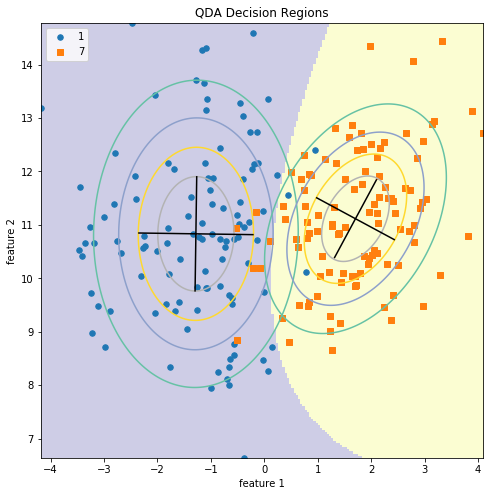

In [20]:
visuaization_qda(rd_x_train, conver_y_train, mu, covmat, p)

### 4.4 Performance evaluation

In [21]:
def cross_validation_qda(f_data, f_target, fold_num = 10):
    error_rates = []
    for _ in range(fold_num):
        X_train, X_test, y_train, y_test = train_test_split(f_data, f_target, 
                                                test_size=2/5, random_state=None)
        rd_x_train, rd_x_test = reduce_dim(X_train), reduce_dim(X_test)
        # convert the labels:
        conver_y_test = np.zeros_like(y_test)
        conver_y_test[y_test == 1] = 0
        conver_y_test[y_test == 7] = 1
        mu, covmat, p = fit_qda(rd_x_train, y_train)
        predicted_labels = predict_qda(mu, covmat, p, rd_x_test)
        error_rates.append(len(np.where(predicted_labels!=conver_y_test)[0])\
                               / len(conver_y_test))
        
    print("QDA average test error rates of {}-fold cross validation: {:.4f}%"\
          .format(fold_num, np.mean(error_rates)*100))

<span style =" color : green ;font - weight : bold ">The accuracy is less.

In [22]:
cross_validation_qda(f_data, f_target, fold_num = 10)

QDA average test error rates of 10-fold cross validation: 5.7241%


## 5 LDA

### 5.1 Implement LDA Training

<span style =" color : green ;font - weight : bold ">Same as for QDA, the initialisation of variables as lists would be more efficient.

In [23]:
def fit_lda(training_features, training_labels):
    N, D = training_features.shape
    assert N == len(training_labels)
    label_names = np.unique(training_labels)
    K = len(label_names)
    # initialization:
    labels = np.zeros(N)
    mu = np.zeros((K,D))
    covmat = np.zeros((K,D,D))
    p = np.zeros(K)
    
    for i,l in enumerate(label_names):
        # convert labels
        labels[training_labels == l] == i
        mu[i, :] = np.mean(training_features[training_labels == l], axis=0).T
                                    
        p[i] = len(training_labels[training_labels == l]) / N
    covmat = np.dot((training_features-np.mean(training_features, axis=0)).T,
                     training_features-np.mean(training_features, axis=0))

    return mu, covmat/N, p

In [24]:
# Apply the fit function to training data from task 2.1:
mu_lda, covmat_lda, p_lda = fit_lda(rd_x_train, y_train)
print("mu:\n{}\ncovmat:\n{}\np:\n{}".format(mu_lda, covmat_lda, p_lda))

mu:
[[-1.2794397  10.8325889 ]
 [ 1.70738367 11.11522087]]
covmat:
[[3.24942336 0.42460431]
 [0.42460431 2.02166768]]
p:
[0.5 0.5]


### 5.2 Implement LDA Prediction

<span style =" color : green ;font - weight : bold ">The implementation is correct but could be made better (as commented for the QDA implementation).

In [25]:
def predict_lda(mu, covmat, p, test_features):
    # check dim:
    assert mu.shape[1] == test_features.shape[1]
    K = len(p)
    pred = np.zeros((len(test_features), K))
    for i in range(K):
        for j in range(len(test_features)):
            pred[j, i] = 2 * np.dot(np.dot(mu[i].T, np.linalg.inv(covmat)), 
                                    test_features[j].T) \
                        - 0.5 * np.log(np.linalg.det(2 * np.pi * covmat)) \
                        + np.log(p[i]) \
                        - np.dot(np.dot(mu[i].T, np.linalg.inv(covmat)), mu[i])
        
    return np.argmax(pred, axis=1)

In [26]:
# Apply the function separately to training data:
predicted_train_labels = predict_lda(mu_lda, covmat_lda, p_lda, rd_x_train)

<span style =" color : green ;font - weight : bold ">The accuracy is very less.

In [27]:
# compute the training error rate:
lda_train_error = 1 - len(np.where(predicted_train_labels==conver_y_train)[0])\
                    / len(conver_y_train)
print("LDA train error rate: {:.4f}%".format(lda_train_error*100))

LDA train error rate: 5.0926%


In [28]:
# Apply the function separately to training and test data
predicted_test_labels = predict_lda(mu_lda, covmat_lda, p_lda, rd_x_test)

In [29]:
# compute the test error rate:
lda_test_error = 1 - len(np.where(predicted_test_labels==conver_y_test)[0])\
                   / len(conver_y_test)
print("LDA test error rate: {:.4f}%".format(lda_test_error*100))

LDA test error rate: 7.5862%


### 5.3 Visualization

In [30]:
def visuaization_lda(rd_x_train, conver_y_train, mu, covmat, p):
    markers = ['o', 's', '*', 'x', '+', 'D']
    
    feat_min, feat_max = np.min(rd_x_train, axis=0), np.max(rd_x_train, axis=0)
    x = np.linspace(feat_min[0], feat_max[0], 200)
    y = np.linspace(feat_max[1], feat_min[1], 200)
    xx = np.array(np.meshgrid(x, y)).reshape(2, -1).T
    predicted_labels = predict_lda(mu, covmat, p, xx)
    
    plt.figure(figsize=(8, 8))
    plt.title("LDA Decision Regions")
    plt.imshow(predicted_labels.reshape(-1, 200),
               cmap="plasma",
               alpha=0.2, 
               extent=(feat_min[0], feat_max[0], feat_min[1], feat_max[1]))

    zz = np.zeros_like(xx)
    for i in range(len(np.unique(conver_y_train))):
        # plot sample points:
        plt.scatter(rd_x_train[conver_y_train == i, 0], 
                    rd_x_train[conver_y_train == i, 1], 
                    marker=markers[i], s=30, cmap="Set2", 
                    label= np.unique(y_train)[i])

        # plot contour line:
        for j in range(len(xx)):
            zz[j,i] = -0.5 * np.dot(np.dot((xx[j] - mu[i]).T, 
                                np.linalg.inv(covmat)), 
                                xx[j] - mu[i])
        plt.contour(x, y, np.exp(zz[:,i]).reshape(-1, 200), 5, cmap="Set2")

        # compute eigenvalue:
        [lamb1, lamb2], [vec_1, vec_2] = np.linalg.eig(covmat)
        lamb1, lamb2 = np.sqrt(lamb1), np.sqrt(lamb2)
        
        # plot eigenvalue/eigenvector decomposition:
        for d in range(rd_x_train.shape[1]):
            x_d, y_d = ([mu[i,0] - lamb1*vec_1[d], mu[i,0] + lamb1*vec_1[d]],
                        [mu[i,1] - lamb1*vec_2[d], mu[i,1] + lamb1*vec_2[d]])
            plt.plot(x_d, y_d, "k")

    plt.xlim(feat_min[0], feat_max[0])
    plt.ylim(feat_min[1], feat_max[1])

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.show()

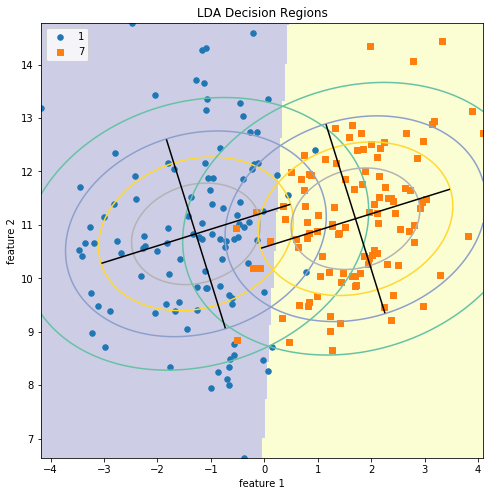

In [31]:
visuaization_lda(rd_x_train, conver_y_train, mu_lda, covmat_lda, p_lda)

### 5.4 Performance evaluation

In [32]:
def cross_validation_lda(f_data, f_target, fold_num = 10):
    error_rates = []
    for _ in range(fold_num):
        X_train, X_test, y_train, y_test = train_test_split(f_data, f_target, 
                                                test_size=2/5, random_state=None)
        rd_x_train, rd_x_test = reduce_dim(X_train), reduce_dim(X_test)
        # convert the labels:
        conver_y_test = np.zeros_like(y_test)
        conver_y_test[y_test == 1] = 0
        conver_y_test[y_test == 7] = 1
        mu, covmat, p = fit_lda(rd_x_train, y_train)
        predicted_labels = predict_lda(mu, covmat, p, rd_x_test)
        error_rates.append(len(np.where(predicted_labels!=conver_y_test)[0])\
                               / len(conver_y_test))
        
    print("LDA average test error rates of {}-fold cross validation: {:.4f}%"\
          .format(fold_num, np.mean(error_rates)*100))

In [33]:
cross_validation_lda(f_data, f_target, fold_num = 10)

LDA average test error rates of 10-fold cross validation: 6.8966%
